In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('fish.csv')

In [4]:
#1
pd.get_dummies(df.Species)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [5]:
df['Perch'] = pd.get_dummies(df.Species)['Perch']

In [6]:
df['Bream'] = pd.get_dummies(df.Species)['Bream']

In [7]:
df['Smelt'] = pd.get_dummies(df.Species)['Smelt']


In [8]:
df['Parkki'] = pd.get_dummies(df.Species)['Parkki']

In [9]:
df['Pike'] = pd.get_dummies(df.Species)['Pike']

In [10]:
df['Roach'] = pd.get_dummies(df.Species)['Roach']

In [11]:
#3
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Perch,Bream,Smelt,Parkki,Pike,Roach
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,0.352201,0.220126,0.088050,0.069182,0.106918,0.125786
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,0.479165,0.415640,0.284263,0.254566,0.309986,0.332656
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#2 Increase in the length would increase the weight
# Increase in the height would increase the weight
# Increase in the width would increase the weight

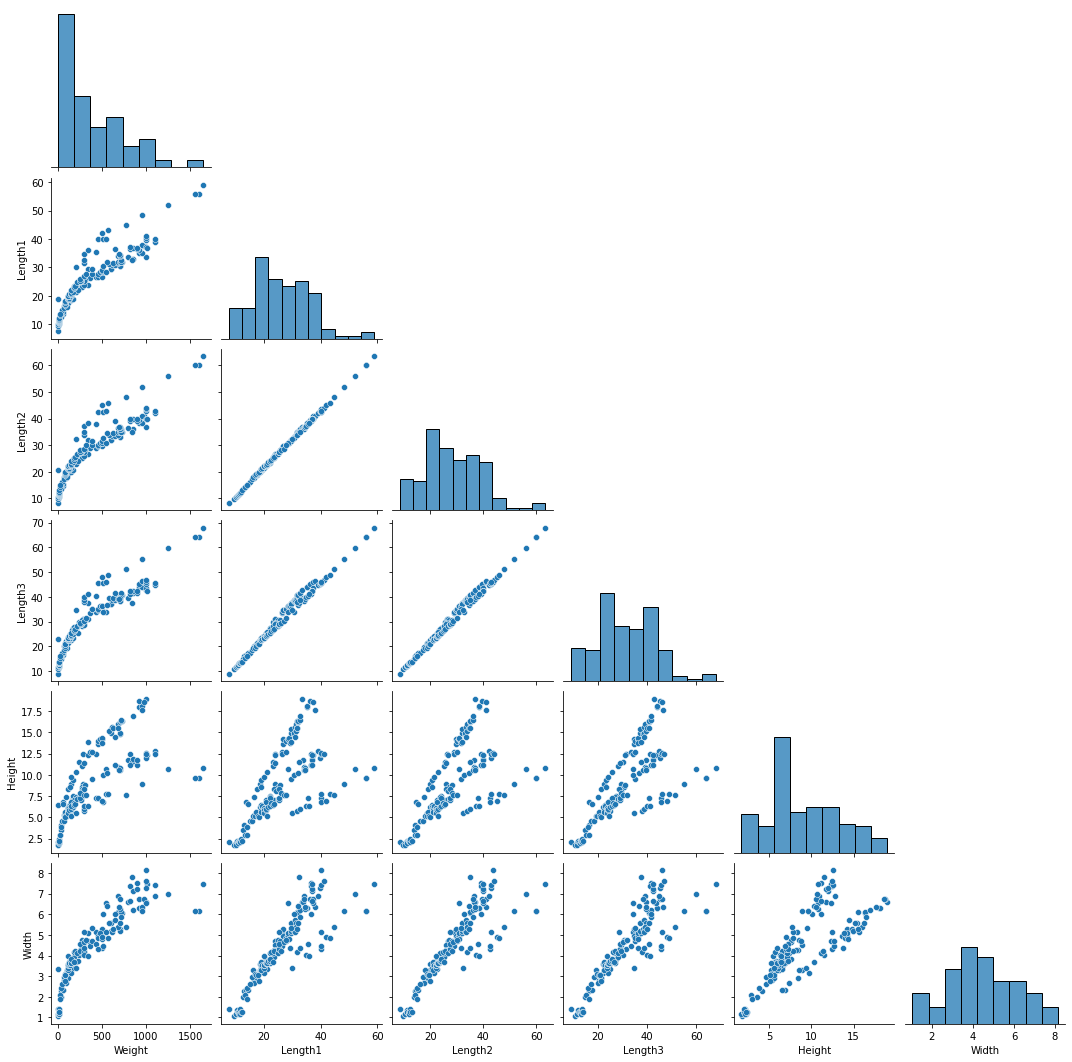

In [13]:
#4
sns.pairplot(df,x_vars=['Weight','Length1','Length2','Length3','Height','Width'],y_vars=['Weight','Length1','Length2','Length3','Height','Width'],corner=True)
plt.show()

In [15]:
#5
X=df[['Length1','Length2','Length3','Height','Width','Perch','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)
y=df['Weight']

In [16]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

    feature          VIF
0     const    82.487540
1   Length1  2360.425082
2   Length2  4307.918109
3   Length3  2076.937150
4    Height    56.203702
5     Width    29.166505
6     Perch    11.548155
7     Bream    28.967564
8     Roach     4.509769
9    Parkki     4.385430
10     Pike    12.152451
11    Smelt     5.729956


In [17]:
X=df[['Length1','Length3','Height','Width','Perch','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

    feature          VIF
0     const    82.179759
1   Length1  1034.701046
2   Length3  1186.036510
3    Height    56.027171
4     Width    28.877523
5     Perch    10.257689
6     Bream    23.912572
7     Roach     4.111114
8    Parkki     4.241449
9      Pike    12.152377
10    Smelt     5.686237


In [19]:
X=df[['Length1','Height','Width','Perch','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

   feature        VIF
0    const  49.345411
1  Length1  27.038193
2   Height  54.308628
3    Width  28.647082
4    Perch   7.484250
5    Bream  18.434467
6    Roach   4.101663
7   Parkki   4.142559
8     Pike  12.151320
9    Smelt   4.488930


In [21]:
X=df[['Length1','Width','Perch','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)

In [22]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

   feature        VIF
0    const  47.824543
1  Length1  23.492906
2    Width  18.014835
3    Perch   6.790000
4    Bream   5.450751
5    Roach   4.050127
6   Parkki   2.874761
7     Pike   8.912504
8    Smelt   4.117806


In [24]:
X=df[['Width','Perch','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)

In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0   const  46.931422
1   Width   1.926255
2   Perch   6.776245
3   Bream   5.329382
4   Roach   4.035398
5  Parkki   2.860138
6    Pike   3.433218
7   Smelt   3.975374


In [26]:
X=df[['Width','Bream','Roach','Parkki','Pike','Smelt']]
X = sm.add_constant(X)

In [27]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0   const  18.193255
1   Width   1.902853
2   Bream   1.263380
3   Roach   1.255620
4  Parkki   1.206400
5    Pike   1.142659
6   Smelt   1.771601


In [28]:
#6
model = sm.OLS(y,X).fit()
y_pred = model.predict(X)
resid = y - y_pred

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.87e-67
Time:                        09:35:35   Log-Likelihood:                -992.27
No. Observations:                 159   AIC:                             1999.
Df Residuals:                     152   BIC:                             2020.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -614.4433     42.964    -14.301      0.0

In [30]:
#7 
#R^2 is 88% of the variation and weight can be explaned by the model
# If you increase width in 1 cm weight will increase by 209 grams
# Increase in bream will increase the weight by 93 grams
#Increase in Roach will decrease the weight by 1.42 grams
#Increase in Parkki will increase the weight by 93 grams
#Increase in Pike will increase the weight by 265 grams
#Increase in Smelt will increase the weight by 344 grams
# p-values are all less than 0.5 except for Roach
# Yes, it makes sense

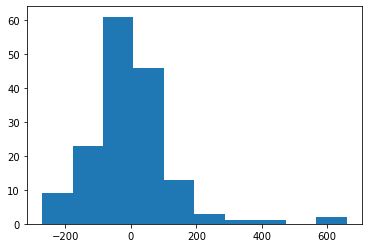

In [31]:
#8
plt.hist(resid)
plt.show()

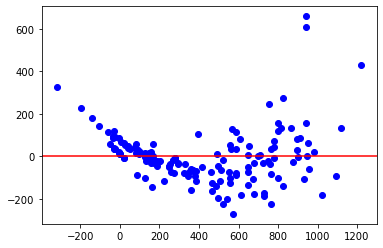

In [32]:
plt.scatter(y_pred,resid,color='b')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
#9
#Linearity fails because of the curve in the residual plot
#Normality fails because of the skew in the residual histogram
#Constant Variance fails because the residual gets wider
#No multicolinearity passes because all the VIFs are less than 5
#No Autocorrelation passes because it's not time series